## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap NULL scan (normal)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [40]:
directory = '/home/user/notebooks/pcaps/nmap_null_scan_normal'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [42]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

1999    0.054336
Name: time, dtype: float64

In [43]:
duration_list = []
for t in scan_list:
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [44]:
scan_times
#duration_list

0    0.054336
1    0.057069
2    0.063002
3    0.075858
4    0.078239
5    0.071296
6    0.072258
7    0.057761
8    0.068096
9    0.056985
Name: Scan times, dtype: float64

In [45]:
temp = pd.DataFrame(duration_list)

In [46]:
temp.mean()

0    0.06549
dtype: float64

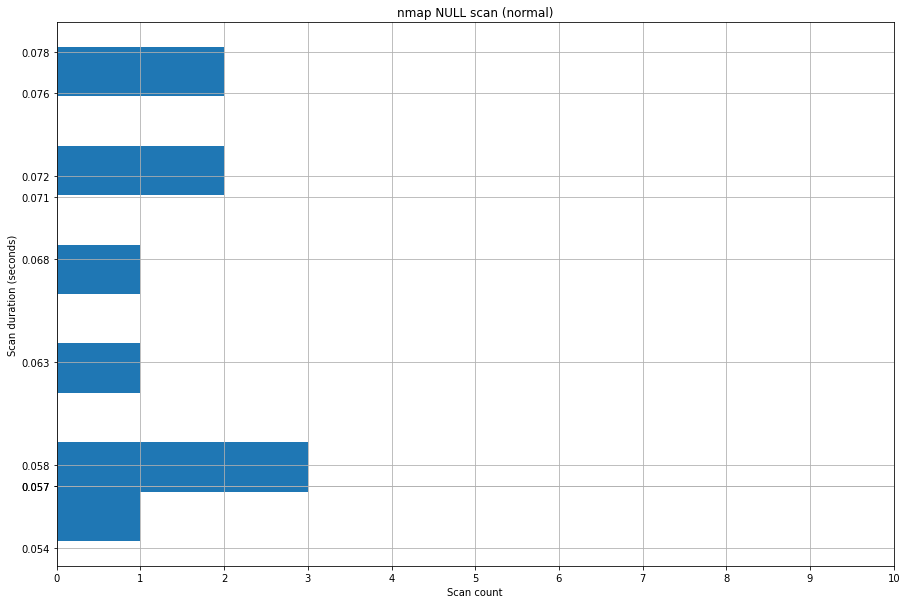

In [47]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [48]:
temp.describe()

,0
count,10.000000
mean,0.065490
std,0.008755
min,0.054336
25%,0.057242
50%,0.065549
75%,0.072017
max,0.078239


## Packet count

In [49]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [50]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 20000
Overall sent packets to scanner: 10000
Overall received packets from scanner: 10000


## Packets pr. second

In [51]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 1309.7996711730957



## Order of ports scanned


In [52]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 64107 80
2 64107 5900
3 64107 135
4 64107 587
5 64107 22
6 64107 113
7 64107 1720
8 64107 993
9 64107 8080
10 64107 143
11 64107 110
12 64107 3389
13 64107 53
14 64107 443
15 64107 25
16 64107 199
17 64107 1723
18 64107 445
19 64107 256
20 64107 3306
21 64107 8888
22 64107 111
23 64107 554
24 64107 21
25 64107 1025
26 64107 995
27 64107 23
28 64107 139
29 64107 5003
30 64107 90
31 64107 56737
32 64107 3869
33 64107 1036
34 64107 1900
35 64107 705
36 64107 1216
37 64107 1185
38 64107 64623
39 64107 20005
40 64107 6004
41 64107 1099
42 64107 280
43 64107 50389
44 64107 1114
45 64107 2100
46 64107 2401
47 64107 1079
48 64107 2260
49 64107 765
50 64107 8002
51 64107 9418
52 64107 61900
53 64107 10566
54 64107 15742
55 64107 987
56 64107 3826
57 64107 6667
58 64107 106
59 64107 21571
60 64107 2004
61 64107 1998
62 64107 9080
63 64107 8500
64 64107 179
65 64107 5002
66 64107 9090
67 64107 992
68 64107 6901
69 64107 2047
70 64107 20828
71 64107 3878
72 64107 7070
73 64107 5631
74 64107 5440

604 64107 2605
605 64107 3945
606 64107 28201
607 64107 212
608 64107 7741
609 64107 1119
610 64107 903
611 64107 1066
612 64107 2121
613 64107 32779
614 64107 5033
615 64107 4567
616 64107 9091
617 64107 1433
618 64107 11110
619 64107 8010
620 64107 1051
621 64107 1050
622 64107 5009
623 64107 2381
624 64107 25735
625 64107 9110
626 64107 2366
627 64107 636
628 64107 6566
629 64107 2394
630 64107 10628
631 64107 7402
632 64107 3367
633 64107 1812
634 64107 4443
635 64107 3128
636 64107 880
637 64107 8383
638 64107 1071
639 64107 7002
640 64107 3370
641 64107 9917
642 64107 5087
643 64107 2910
644 64107 37
645 64107 6123
646 64107 1521
647 64107 1328
648 64107 1719
649 64107 1233
650 64107 1972
651 64107 7019
652 64107 5280
653 64107 8084
654 64107 33354
655 64107 9002
656 64107 40911
657 64107 259
658 64107 5800
659 64107 82
660 64107 16012
661 64107 8222
662 64107 65389
663 64107 801
664 64107 3851
665 64107 5101
666 64107 20222
667 64107 783
668 64107 25734
669 64107 49400
670 64107

497 63481 5998
498 63481 33899
499 63481 56737
500 63481 1052
501 63481 749
502 63481 7
503 63481 8443
504 63481 7007
505 63481 1080
506 63481 49153
507 63481 1201
508 63481 4343
509 63481 1971
510 63481 16113
511 63481 6699
512 63481 2522
513 63481 5510
514 63481 10024
515 63481 464
516 63481 5850
517 63481 50006
518 63481 8002
519 63481 50389
520 63481 777
521 63481 5221
522 63481 44443
523 63481 1218
524 63481 3659
525 63481 10010
526 63481 49157
527 63481 8045
528 63481 52673
529 63481 1030
530 63481 3517
531 63481 3689
532 63481 34573
533 63481 9593
534 63481 2161
535 63481 1132
536 63481 667
537 63481 44442
538 63481 8090
539 63481 49161
540 63481 9091
541 63481 9009
542 63481 2010
543 63481 88
544 63481 60020
545 63481 2382
546 63481 57294
547 63481 43
548 63481 48080
549 63481 8000
550 63481 27000
551 63481 1104
552 63481 34572
553 63481 254
554 63481 10001
555 63481 1174
556 63481 3052
557 63481 25735
558 63481 2525
559 63481 6566
560 63481 20000
561 63481 4003
562 63481 55600

59 63123 3476
60 63123 1199
61 63123 3003
62 63123 1098
63 63123 6129
64 63123 212
65 63123 65389
66 63123 3370
67 63123 9220
68 63123 6
69 63123 1108
70 63123 8007
71 63123 1914
72 63123 12345
73 63123 8086
74 63123 2701
75 63123 9290
76 63123 8090
77 63123 55555
78 63123 6692
79 63123 1501
80 63123 32783
81 63123 9100
82 63123 84
83 63123 106
84 63123 50300
85 63123 6580
86 63123 3011
87 63123 3404
88 63123 2525
89 63123 3878
90 63123 1065
91 63123 49165
92 63123 8651
93 63123 1095
94 63123 1151
95 63123 636
96 63123 900
97 63123 1503
98 63123 720
99 63123 4662
100 63123 5009
101 63123 1309
102 63123 1533
103 63123 1078
104 63123 2190
105 63123 800
106 63123 1114
107 63123 9080
108 63123 3998
109 63123 2035
110 63123 8701
111 63123 7911
112 63123 1999
113 63123 787
114 63123 5432
115 63123 1037
116 63123 5801
117 63123 1033
118 63123 1070
119 63123 10000
120 63123 27715
121 63123 3017
122 63123 306
123 63123 13782
124 63123 2001
125 63123 222
126 63123 9
127 63123 259
128 63123 1024


608 63123 1174
609 63123 3690
610 63123 9900
611 63123 10626
612 63123 2323
613 63123 1198
614 63123 6101
615 63123 1500
616 63123 1718
617 63123 14238
618 63123 4998
619 63123 1192
620 63123 32781
621 63123 5269
622 63123 2381
623 63123 2002
624 63123 6000
625 63123 8500
626 63123 3827
627 63123 6123
628 63123 1259
629 63123 8008
630 63123 458
631 63123 4129
632 63123 51103
633 63123 7070
634 63123 6543
635 63123 1121
636 63123 1067
637 63123 1083
638 63123 5555
639 63123 5925
640 63123 1117
641 63123 1862
642 63123 2875
643 63123 8021
644 63123 5033
645 63123 2500
646 63123 49175
647 63123 1524
648 63123 3801
649 63123 2034
650 63123 2119
651 63123 500
652 63123 179
653 63123 5100
654 63123 4242
655 63123 4224
656 63123 5915
657 63123 1075
658 63123 873
659 63123 544
660 63123 1087
661 63123 161
662 63123 5060
663 63123 40911
664 63123 33
665 63123 9103
666 63123 407
667 63123 2702
668 63123 1030
669 63123 1132
670 63123 5679
671 63123 9091
672 63123 7200
673 63123 15000
674 63123 60

163 63919 8193
164 63919 3580
165 63919 49158
166 63919 8100
167 63919 5550
168 63919 1088
169 63919 9040
170 63919 888
171 63919 1658
172 63919 2701
173 63919 7777
174 63919 1059
175 63919 3878
176 63919 4111
177 63919 64680
178 63919 21571
179 63919 2103
180 63919 987
181 63919 5998
182 63919 5862
183 63919 3493
184 63919 6788
185 63919 7443
186 63919 10621
187 63919 32781
188 63919 2323
189 63919 1556
190 63919 9003
191 63919 1137
192 63919 62078
193 63919 10628
194 63919 625
195 63919 15660
196 63919 4242
197 63919 8022
198 63919 1093
199 63919 9944
200 63919 563
201 63919 497
202 63919 1666
203 63919 40193
204 63919 1719
205 63919 7007
206 63919 2968
207 63919 6059
208 63919 14238
209 63919 7106
210 63919 1185
211 63919 2910
212 63919 32782
213 63919 3404
214 63919 417
215 63919 1875
216 63919 1113
217 63919 3017
218 63919 1081
219 63919 4662
220 63919 13722
221 63919 1058
222 63919 1046
223 63919 5904
224 63919 808
225 63919 4125
226 63919 1000
227 63919 2607
228 63919 27355
229 

163 63287 1073
164 63287 2020
165 63287 1248
166 63287 6667
167 63287 3367
168 63287 1782
169 63287 55056
170 63287 3011
171 63287 1455
172 63287 49155
173 63287 1002
174 63287 8002
175 63287 85
176 63287 4045
177 63287 264
178 63287 50001
179 63287 4343
180 63287 1093
181 63287 1100
182 63287 5987
183 63287 27353
184 63287 749
185 63287 5907
186 63287 3013
187 63287 7019
188 63287 81
189 63287 1123
190 63287 8089
191 63287 1064
192 63287 3914
193 63287 8000
194 63287 64680
195 63287 146
196 63287 32784
197 63287 2005
198 63287 1687
199 63287 24
200 63287 2103
201 63287 55555
202 63287 50002
203 63287 1035
204 63287 3323
205 63287 1060
206 63287 5510
207 63287 4445
208 63287 9040
209 63287 48080
210 63287 10003
211 63287 5963
212 63287 407
213 63287 5560
214 63287 3052
215 63287 163
216 63287 1141
217 63287 2702
218 63287 12000
219 63287 2179
220 63287 1311
221 63287 10621
222 63287 49161
223 63287 1500
224 63287 26
225 63287 61532
226 63287 9968
227 63287 4224
228 63287 10616
229 6328

793 63287 8333
794 63287 1272
795 63287 5925
796 63287 5102
797 63287 1124
798 63287 3889
799 63287 2196
800 63287 9415
801 63287 8192
802 63287 5566
803 63287 49152
804 63287 1071
805 63287 3880
806 63287 6001
807 63287 5810
808 63287 2875
809 63287 58080
810 63287 8651
811 63287 1089
812 63287 7000
813 63287 2869
814 63287 1113
815 63287 6346
816 63287 14238
817 63287 3168
818 63287 3766
819 63287 50000
820 63287 1097
821 63287 1287
822 63287 9081
823 63287 6100
824 63287 56738
825 63287 3260
826 63287 1130
827 63287 900
828 63287 1079
829 63287 2045
830 63287 6788
831 63287 4567
832 63287 1863
833 63287 593
834 63287 3998
835 63287 10180
836 63287 2033
837 63287 5822
838 63287 3918
839 63287 1076
840 63287 5730
841 63287 1043
842 63287 6668
843 63287 8084
844 63287 32779
845 63287 4444
846 63287 1044
847 63287 9500
848 63287 1417
849 63287 1107
850 63287 1972
851 63287 1935
852 63287 179
853 63287 2811
854 63287 3322
855 63287 5811
856 63287 6669
857 63287 7999
858 63287 1042
859 63

829 50576 5862
830 50576 52673
831 50576 4125
832 50576 3905
833 50576 691
834 50576 6002
835 50576 3268
836 50576 2065
837 50576 1099
838 50576 9418
839 50576 2005
840 50576 27353
841 50576 9877
842 50576 8085
843 50576 5911
844 50576 1688
845 50576 1761
846 50576 902
847 50576 7004
848 50576 1126
849 50576 12265
850 50576 2004
851 50576 1113
852 50576 23502
853 50576 1093
854 50576 32776
855 50576 3659
856 50576 417
857 50576 1717
858 50576 2394
859 50576 1862
860 50576 5405
861 50576 10010
862 50576 7
863 50576 5801
864 50576 12174
865 50576 8400
866 50576 7002
867 50576 1721
868 50576 901
869 50576 7512
870 50576 543
871 50576 1123
872 50576 8654
873 50576 544
874 50576 783
875 50576 1053
876 50576 992
877 50576 1028
878 50576 9878
879 50576 1974
880 50576 1801
881 50576 7103
882 50576 2525
883 50576 42510
884 50576 911
885 50576 3
886 50576 16001
887 50576 7070
888 50576 1875
889 50576 8600
890 50576 1090
891 50576 3880
892 50576 57797
893 50576 44443
894 50576 8084
895 50576 9010

495 54290 541
496 54290 1054
497 54290 5214
498 54290 20221
499 54290 2003
500 54290 5988
501 54290 19315
502 54290 1117
503 54290 8292
504 54290 7777
505 54290 2034
506 54290 4129
507 54290 2909
508 54290 16012
509 54290 705
510 54290 49163
511 54290 1501
512 54290 2119
513 54290 32782
514 54290 765
515 54290 1151
516 54290 8084
517 54290 1062
518 54290 301
519 54290 30000
520 54290 3269
521 54290 9618
522 54290 1009
523 54290 49156
524 54290 5901
525 54290 5190
526 54290 2047
527 54290 2107
528 54290 9000
529 54290 19842
530 54290 5959
531 54290 5414
532 54290 3659
533 54290 6025
534 54290 1718
535 54290 27355
536 54290 6000
537 54290 2005
538 54290 2967
539 54290 9593
540 54290 1244
541 54290 8254
542 54290 1083
543 54290 18101
544 54290 20828
545 54290 6881
546 54290 843
547 54290 5825
548 54290 55555
549 54290 3260
550 54290 3878
551 54290 1600
552 54290 1079
553 54290 8082
554 54290 9
555 54290 2522
556 54290 8402
557 54290 1658
558 54290 3011
559 54290 1533
560 54290 992
561 542

66 59150 280
67 59150 783
68 59150 1174
69 59150 1124
70 59150 52869
71 59150 5087
72 59150 1079
73 59150 3766
74 59150 4900
75 59150 1102
76 59150 1054
77 59150 33
78 59150 1271
79 59150 49152
80 59150 1047
81 59150 27000
82 59150 30000
83 59150 10617
84 59150 1248
85 59150 9998
86 59150 2909
87 59150 5214
88 59150 1175
89 59150 7201
90 59150 2045
91 59150 1583
92 59150 2399
93 59150 9101
94 59150 50001
95 59150 3945
96 59150 255
97 59150 2005
98 59150 1033
99 59150 1072
100 59150 714
101 59150 3007
102 59150 6129
103 59150 16001
104 59150 8300
105 59150 8007
106 59150 6969
107 59150 65000
108 59150 4279
109 59150 1121
110 59150 3905
111 59150 3128
112 59150 6839
113 59150 3372
114 59150 3971
115 59150 32774
116 59150 545
117 59150 1086
118 59150 7800
119 59150 1087
120 59150 1947
121 59150 9110
122 59150 1088
123 59150 3077
124 59150 8100
125 59150 11110
126 59150 7070
127 59150 705
128 59150 51493
129 59150 6100
130 59150 9090
131 59150 1185
132 59150 15004
133 59150 22939
134 59150

662 59150 2046
663 59150 2135
664 59150 2030
665 59150 5054
666 59150 211
667 59150 4125
668 59150 990
669 59150 10566
670 59150 4111
671 59150 9103
672 59150 264
673 59150 5001
674 59150 10626
675 59150 179
676 59150 49175
677 59150 9207
678 59150 1066
679 59150 1186
680 59150 8400
681 59150 85
682 59150 9100
683 59150 1092
684 59150 5998
685 59150 1010
686 59150 5051
687 59150 417
688 59150 2161
689 59150 50636
690 59150 20222
691 59150 37
692 59150 10628
693 59150 5190
694 59150 5033
695 59150 1719
696 59150 5566
697 59150 19283
698 59150 3369
699 59150 8083
700 59150 5960
701 59150 6689
702 59150 2601
703 59150 27352
704 59150 902
705 59150 5907
706 59150 20005
707 59150 515
708 59150 34571
709 59150 60443
710 59150 444
711 59150 2869
712 59150 19780
713 59150 808
714 59150 49999
715 59150 999
716 59150 1028
717 59150 1455
718 59150 458
719 59150 1199
720 59150 5500
721 59150 2191
722 59150 8192
723 59150 9099
724 59150 1085
725 59150 1091
726 59150 2607
727 59150 3006
728 59150 38

328 38558 3369
329 38558 9002
330 38558 1063
331 38558 65389
332 38558 2042
333 38558 7443
334 38558 1030
335 38558 10082
336 38558 1068
337 38558 1084
338 38558 49
339 38558 32772
340 38558 5902
341 38558 1059
342 38558 4567
343 38558 28201
344 38558 593
345 38558 4126
346 38558 9500
347 38558 1074
348 38558 1192
349 38558 1839
350 38558 1500
351 38558 12174
352 38558 125
353 38558 4045
354 38558 2041
355 38558 11967
356 38558 7911
357 38558 2043
358 38558 2045
359 38558 8600
360 38558 33
361 38558 4279
362 38558 55055
363 38558 5033
364 38558 1236
365 38558 990
366 38558 56737
367 38558 5877
368 38558 3703
369 38558 1081
370 38558 5001
371 38558 6106
372 38558 700
373 38558 1083
374 38558 1247
375 38558 1088
376 38558 1998
377 38558 146
378 38558 1147
379 38558 1038
380 38558 646
381 38558 1971
382 38558 12265
383 38558 5666
384 38558 2004
385 38558 16016
386 38558 212
387 38558 1187
388 38558 5862
389 38558 3918
390 38558 6792
391 38558 8292
392 38558 3003
393 38558 5959
394 38558 1

995 38558 3301
996 38558 1234
997 38558 9968
998 38558 1600
999 38558 6699
1000 38558 55555
1 44318 80
2 44318 445
3 44318 993
4 44318 21
5 44318 256
6 44318 1723
7 44318 143
8 44318 111
9 44318 8080
10 44318 199
11 44318 443
12 44318 25
13 44318 23
14 44318 8888
15 44318 113
16 44318 110
17 44318 3389
18 44318 1720
19 44318 554
20 44318 587
21 44318 53
22 44318 995
23 44318 1025
24 44318 139
25 44318 5900
26 44318 3306
27 44318 135
28 44318 22
29 44318 17
30 44318 5862
31 44318 5718
32 44318 32768
33 44318 1163
34 44318 33354
35 44318 1700
36 44318 1069
37 44318 1043
38 44318 10004
39 44318 1233
40 44318 5822
41 44318 9001
42 44318 58080
43 44318 646
44 44318 1352
45 44318 1217
46 44318 4567
47 44318 7920
48 44318 2043
49 44318 5961
50 44318 32780
51 44318 3367
52 44318 1098
53 44318 5120
54 44318 2811
55 44318 1072
56 44318 20005
57 44318 32778
58 44318 2500
59 44318 56738
60 44318 6789
61 44318 1026
62 44318 458
63 44318 49165
64 44318 14441
65 44318 10003
66 44318 625
67 44318 2323

661 44318 10215
662 44318 2068
663 44318 8873
664 44318 10626
665 44318 2260
666 44318 280
667 44318 1076
668 44318 888
669 44318 1000
670 44318 17877
671 44318 1521
672 44318 3300
673 44318 8192
674 44318 27000
675 44318 903
676 44318 1152
677 44318 70
678 44318 49159
679 44318 9998
680 44318 990
681 44318 32773
682 44318 366
683 44318 52822
684 44318 27715
685 44318 2170
686 44318 4900
687 44318 617
688 44318 5190
689 44318 481
690 44318 9943
691 44318 49163
692 44318 6646
693 44318 1074
694 44318 1812
695 44318 1100
696 44318 6123
697 44318 1077
698 44318 1086
699 44318 5666
700 44318 1154
701 44318 49157
702 44318 7999
703 44318 9000
704 44318 5631
705 44318 8090
706 44318 1106
707 44318 2557
708 44318 18988
709 44318 1042
710 44318 999
711 44318 687
712 44318 5815
713 44318 6003
714 44318 1721
715 44318 1130
716 44318 5877
717 44318 722
718 44318 1166
719 44318 10082
720 44318 10629
721 44318 5810
722 44318 1068
723 44318 1001
724 44318 4444
725 44318 3005
726 44318 50006
727 4431

In [53]:
orders_port

,scannr,sport,dport
0,1,64107,80
1,2,64107,5900
2,3,64107,135
3,4,64107,587
4,5,64107,22
...,...,...,...
9995,996,44318,1071
9996,997,44318,1138
9997,998,44318,49176
9998,999,44318,900


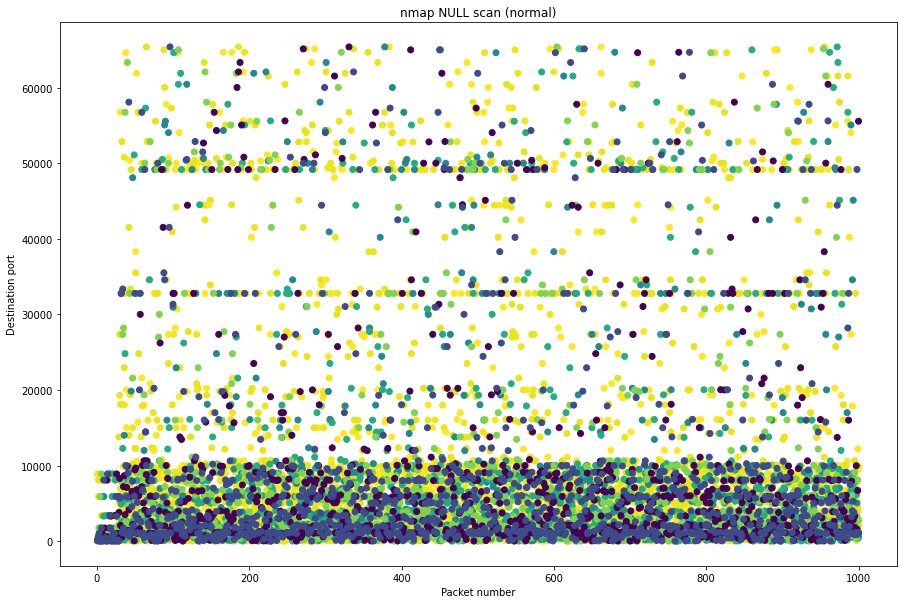

In [54]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [55]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [56]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

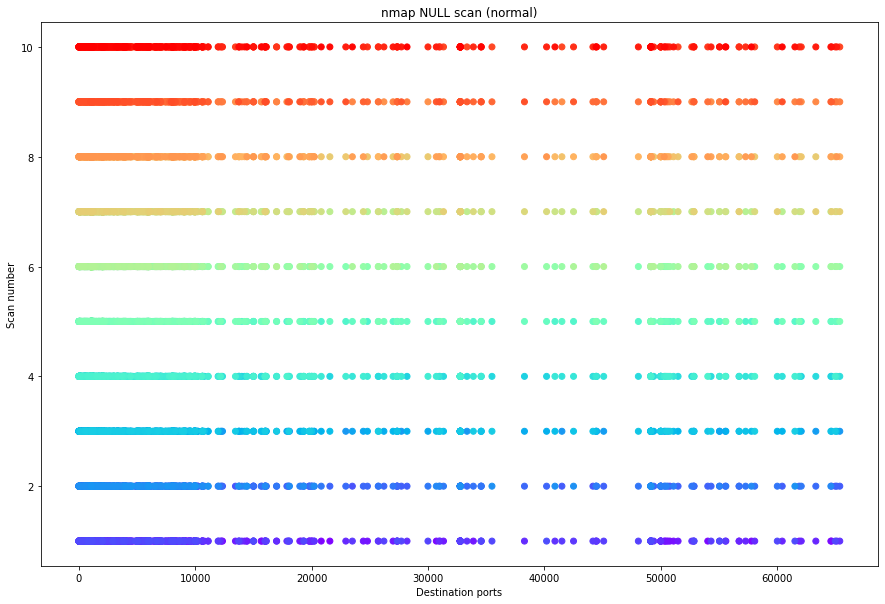

In [57]:
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()

## Payloads

In [58]:
payloads.value_counts()

0.0    10000
dtype: int64

## IP-ID

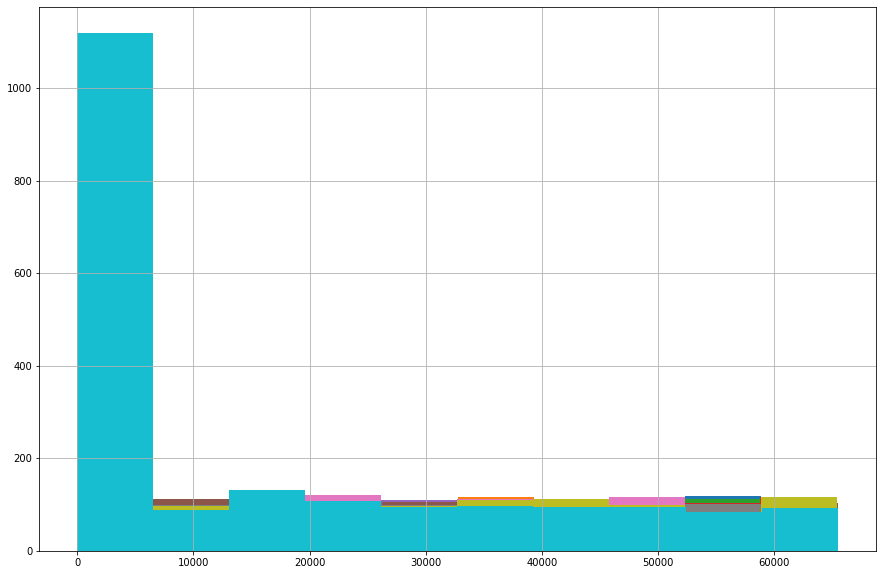

In [62]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

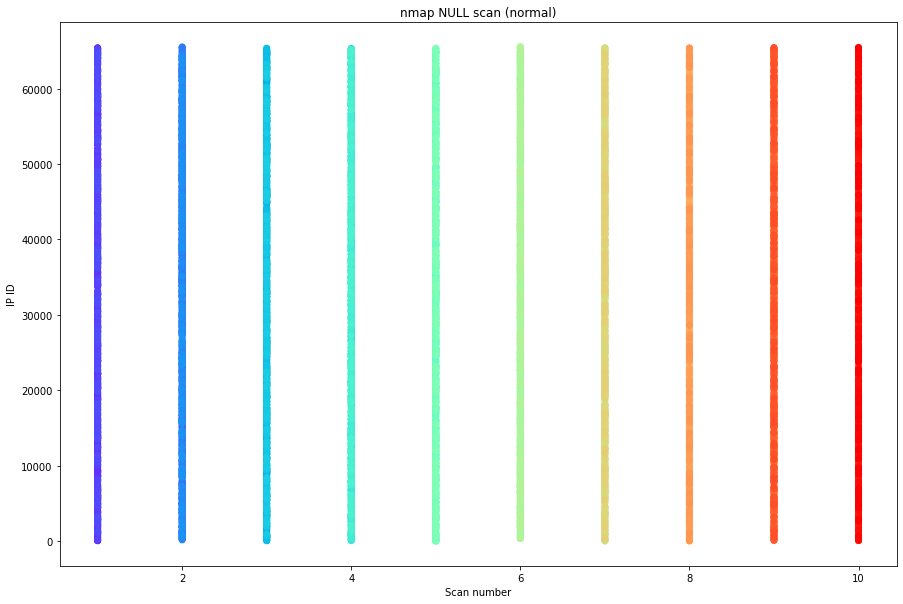

In [63]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()


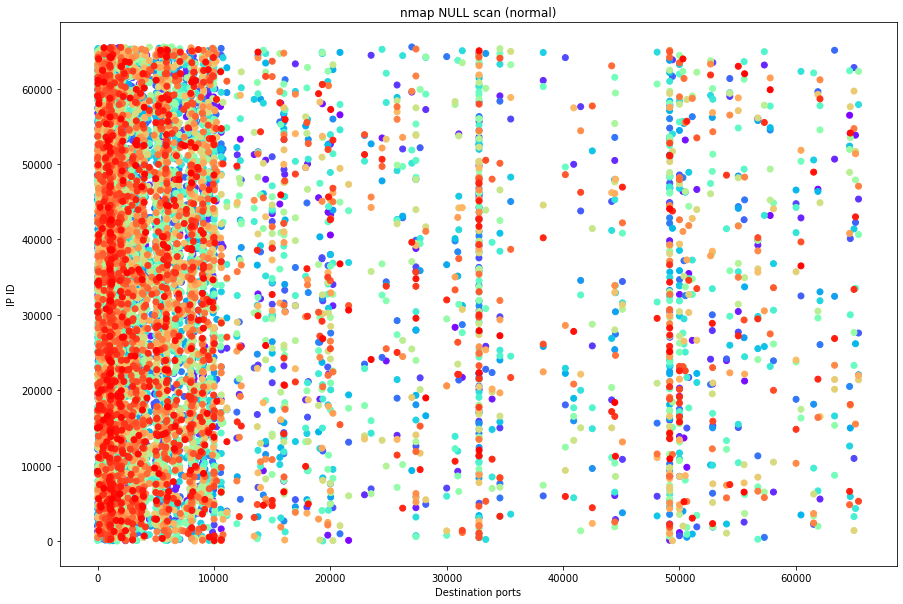

In [64]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])

if dst_ports:
    x = dst_ports
    ys = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

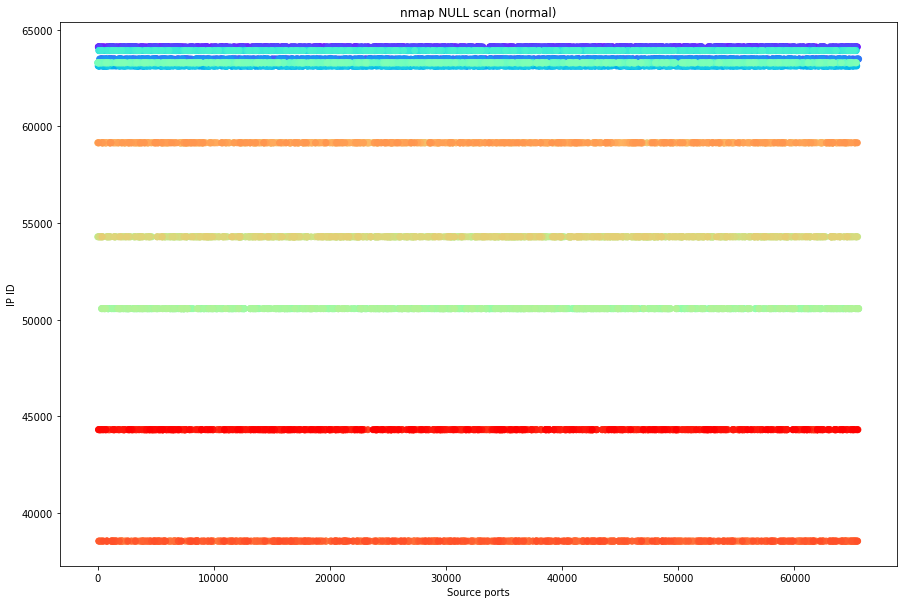

In [65]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Source ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [66]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

## TCP Window size

In [67]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

## Sequence number


In [68]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 244

Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 244

Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 2443662957
Sequence number: 244

Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
S

Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
Sequence number: 508913750
S

Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 425

Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 4259434100
Sequence number: 425

Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 259

Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 2594622883
Sequence number: 259

Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 144

Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 1442516725
Sequence number: 144

Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
S

Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
Sequence number: 840085772
S

Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 350

Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 3502418483
Sequence number: 350

Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
S

Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
Sequence number: 759355380
S

Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 126

Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 1262703702
Sequence number: 126

Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 358

Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 3580919876
Sequence number: 358

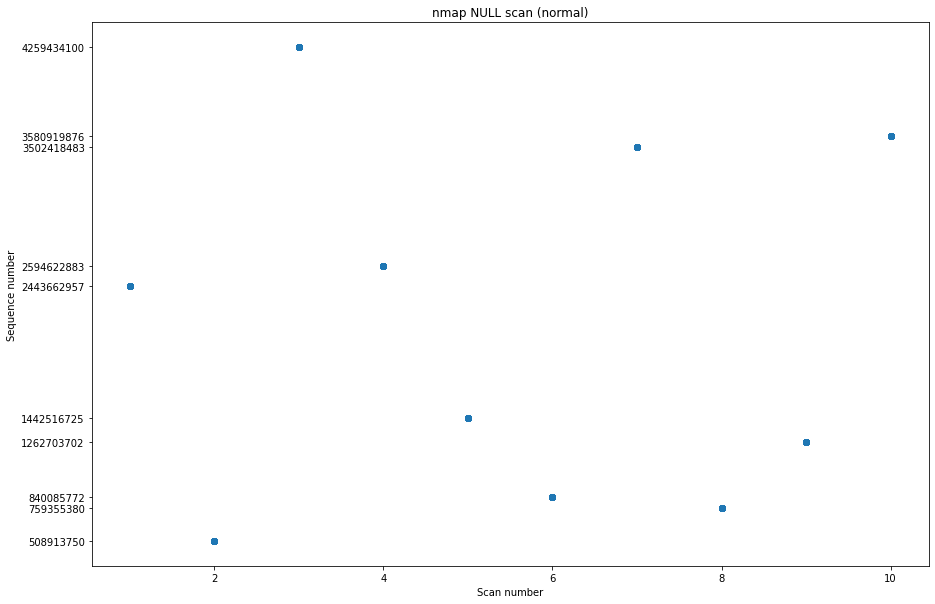

In [69]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()


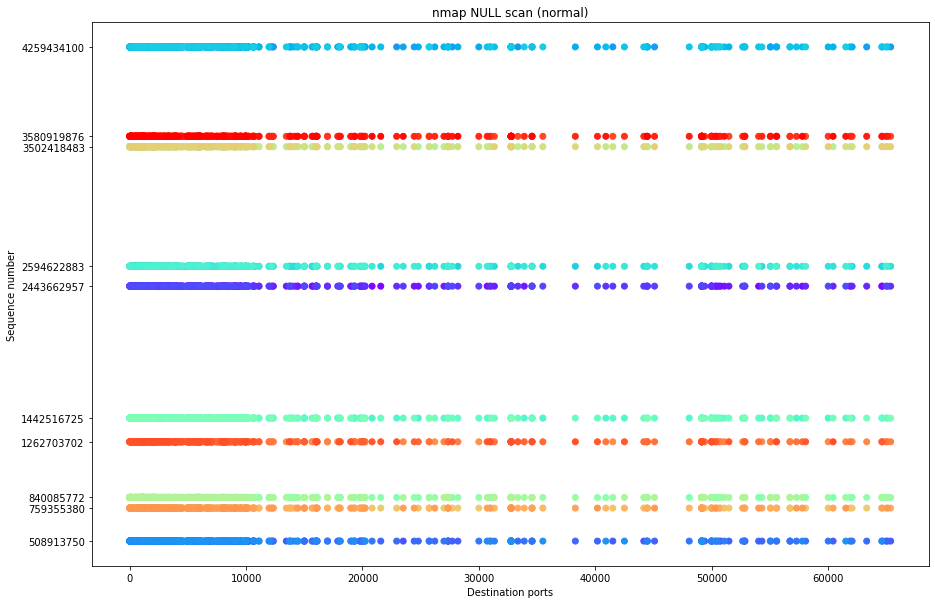

In [70]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

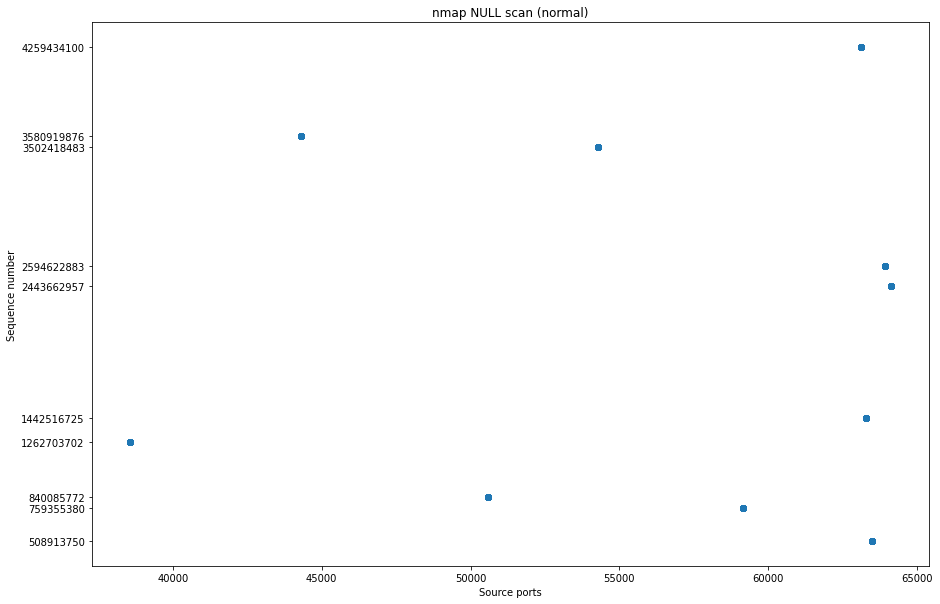

In [71]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()


In [74]:
len(set(orders_port['sport']))

10

## Flags

In [73]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan